# Using ta-lib abstract functions with mplchart

In [1]:
import pandas as pd
import yfinance as yf

import talib

from talib.abstract import Function

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks


In [2]:
functions = [Function(name).info for name in talib.get_functions()]
functions = pd.DataFrame(functions).set_index("name")
functions

,group,display_name,function_flags,input_names,parameters,output_flags,output_names
name,,,,,,,
HT_DCPERIOD,Cycle Indicators,Hilbert Transform - Dominant Cycle Period,[Function has an unstable period],{'price': 'close'},{},{'real': ['Line']},[real]
HT_DCPHASE,Cycle Indicators,Hilbert Transform - Dominant Cycle Phase,[Function has an unstable period],{'price': 'close'},{},{'real': ['Line']},[real]
HT_PHASOR,Cycle Indicators,Hilbert Transform - Phasor Components,[Function has an unstable period],{'price': 'close'},{},"{'inphase': ['Line'], 'quadrature': ['Dashed L...","[inphase, quadrature]"
HT_SINE,Cycle Indicators,Hilbert Transform - SineWave,[Function has an unstable period],{'price': 'close'},{},"{'sine': ['Line'], 'leadsine': ['Dashed Line']}","[sine, leadsine]"
HT_TRENDMODE,Cycle Indicators,Hilbert Transform - Trend vs Cycle Mode,[Function has an unstable period],{'price': 'close'},{},{'integer': ['Line']},[integer]
...,...,...,...,...,...,...,...
NATR,Volatility Indicators,Normalized Average True Range,[Function has an unstable period],"{'prices': ['high', 'low', 'close']}",{'timeperiod': 14},{'real': ['Line']},[real]
TRANGE,Volatility Indicators,True Range,None,"{'prices': ['high', 'low', 'close']}",{},{'real': ['Line']},[real]
AD,Volume Indicators,Chaikin A/D Line,None,"{'prices': ['high', 'low', 'close', 'volume']}",{},{'real': ['Line']},[real]


In [3]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices = prices.rename(columns=str.lower).rename_axis(index=str.lower)
prices

,open,high,low,close,volume,dividends,stock splits
date,,,,,,,
2019-06-06 00:00:00-04:00,44.172501,44.749146,43.948114,44.688828,90105200,0.0,0.0
2019-06-07 00:00:00-04:00,45.000069,46.305364,44.821528,45.878307,122737600,0.0,0.0
2019-06-10 00:00:00-04:00,46.278821,47.137757,46.232978,46.464603,104883600,0.0,0.0
2019-06-11 00:00:00-04:00,47.014708,47.289761,46.710704,47.002644,107731600,0.0,0.0
2019-06-12 00:00:00-04:00,46.795151,47.282526,46.660038,46.853058,73012800,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-30 00:00:00-04:00,190.759995,192.179993,190.630005,191.289993,49947900,0.0,0.0
2024-05-31 00:00:00-04:00,191.440002,192.570007,189.910004,192.250000,75158300,0.0,0.0
2024-06-03 00:00:00-04:00,192.899994,194.990005,192.520004,194.029999,50080500,0.0,0.0


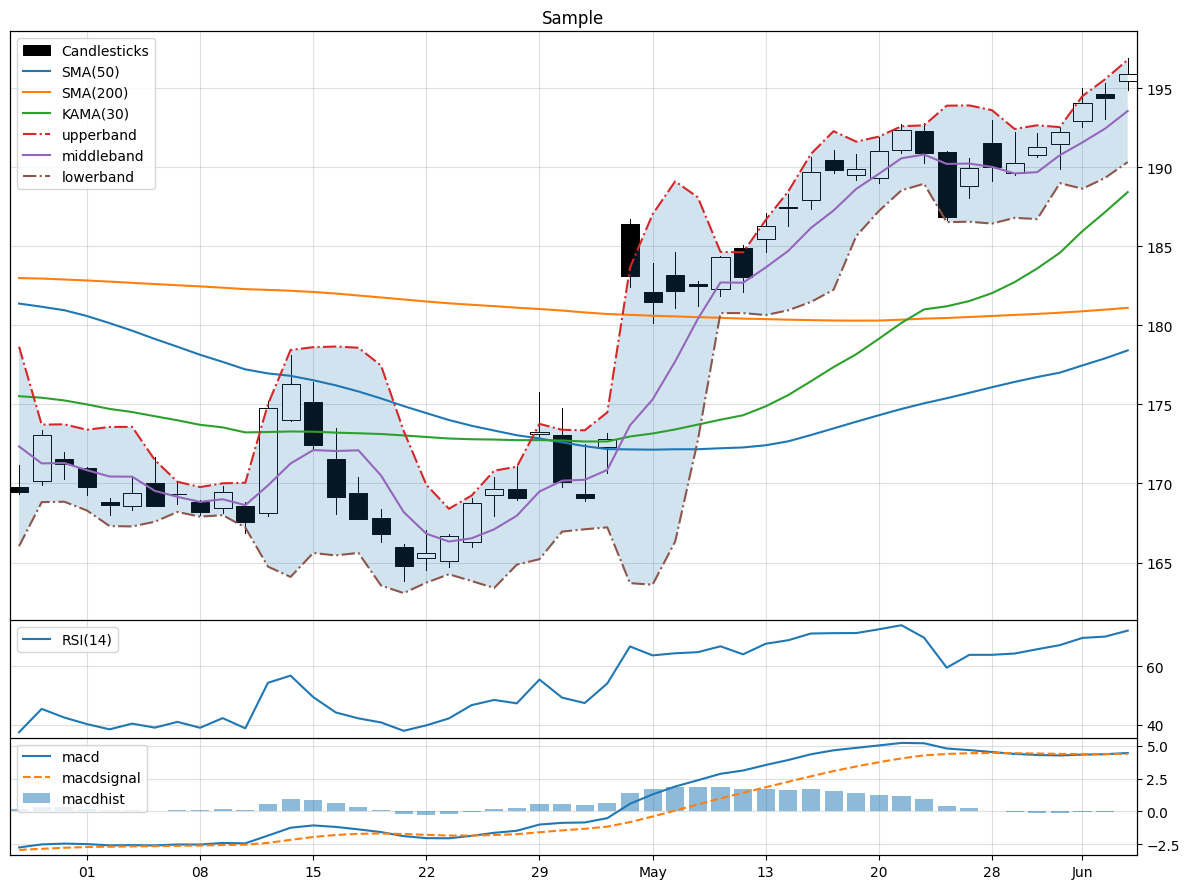

In [4]:
max_bars = 50
indicators = [
    Candlesticks(),
    Function("SMA", 50),
    Function("SMA", 200),
    Function("KAMA"),
    Function("BBANDS"),
    Function("RSI"),
    Function("MACD"),
]

chart = Chart(title="Sample", max_bars=max_bars)
chart.plot(prices, indicators)